<a href="https://colab.research.google.com/github/Mohamed-Maher5/Supervised-Machine-Learning/blob/main/Classification%20SVM/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
## Most Important
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Metrics
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, classification_report, confusion_matrix

## Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

## Algorithms
from sklearn.svm import SVC

## Metric
from sklearn.metrics import accuracy_score

**Study the dataset**

In [ ]:
Mobile_Price_Classification_path = '/content/Mobile_Price_Classification.csv'
Mobile_Price_Classification_dataset = pd.read_csv(Mobile_Price_Classification_path)

In [ ]:
Mobile_Price_Classification_dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
## check the info (nulls and datatypes)
Mobile_Price_Classification_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
## some statistics of the dataset
Mobile_Price_Classification_dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
## check the nulls
Mobile_Price_Classification_dataset.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

WE CAN SEE THERE IS NO NULL VALUES

**Exploratory Data Analysis (EDA)**

In [ ]:
price_range_values = Mobile_Price_Classification_dataset['price_range'].value_counts()
price_range_values

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
# plotting the scatter chart
fig = px.bar(Mobile_Price_Classification_dataset, x='price_range', y='battery_power', color='ram')

# showing the plot
fig.show()

It shows the number of data points that fall within each bin --



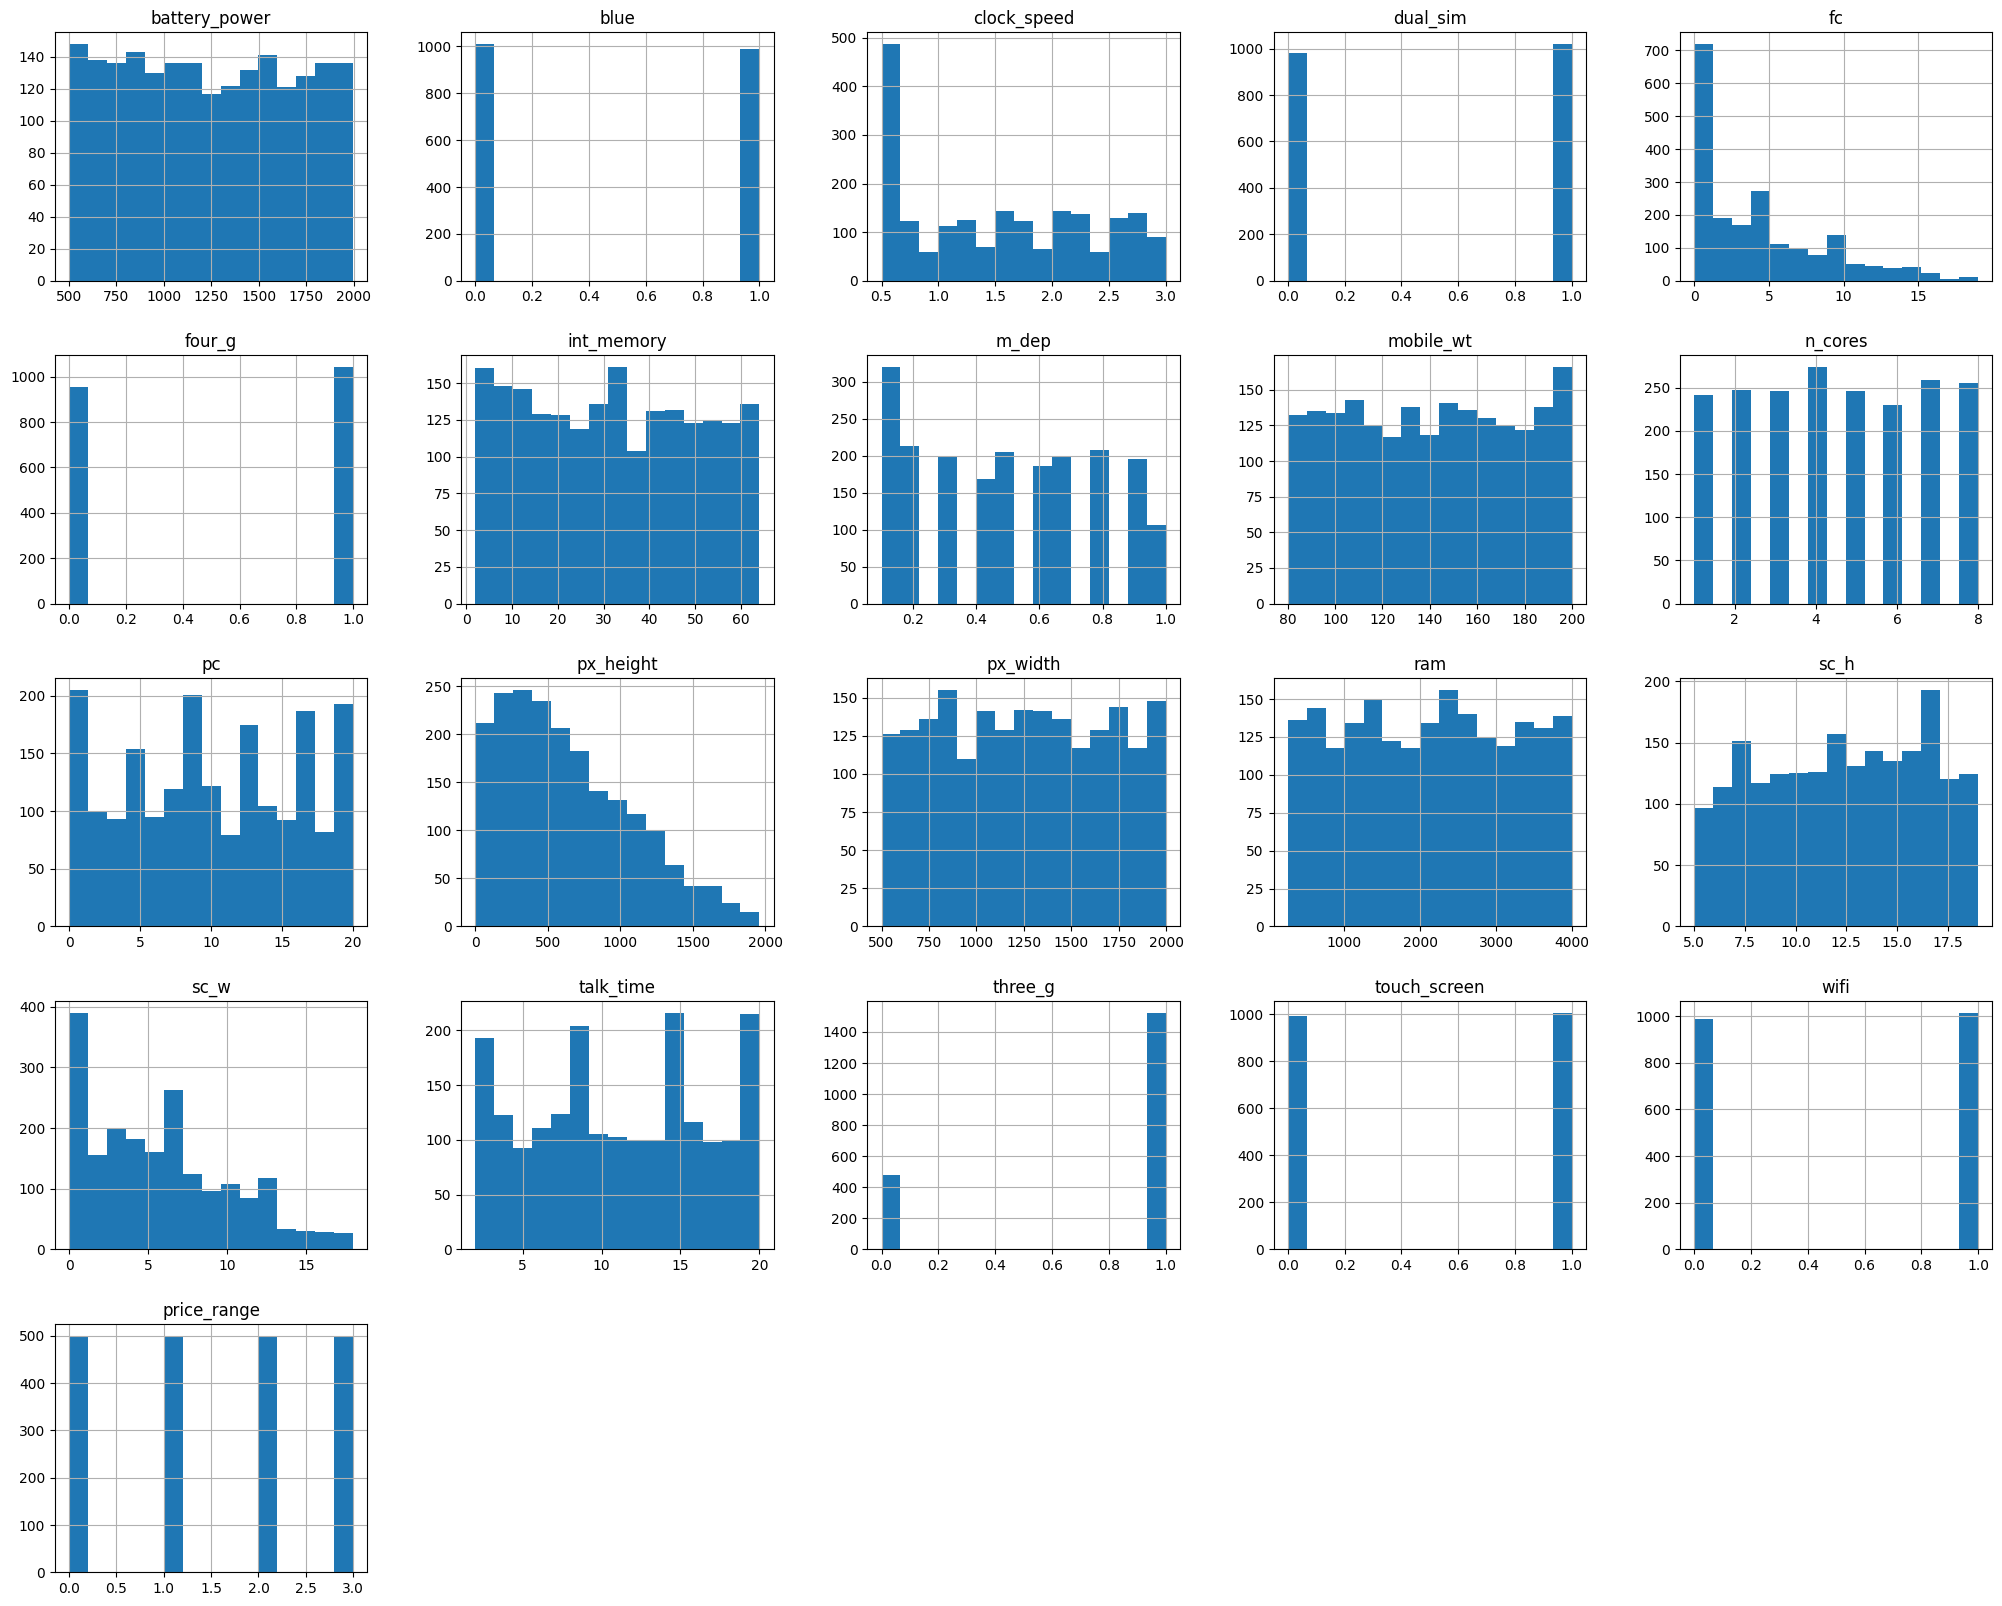

In [ ]:
## Histogram Distribution of Numerical Variables in Dataset
print('It shows the number of data points that fall within each bin --\n')
Mobile_Price_Classification_dataset.hist(bins=15, figsize=(25,20))
plt.show()

<Axes: xlabel='sc_w', ylabel='ram'>

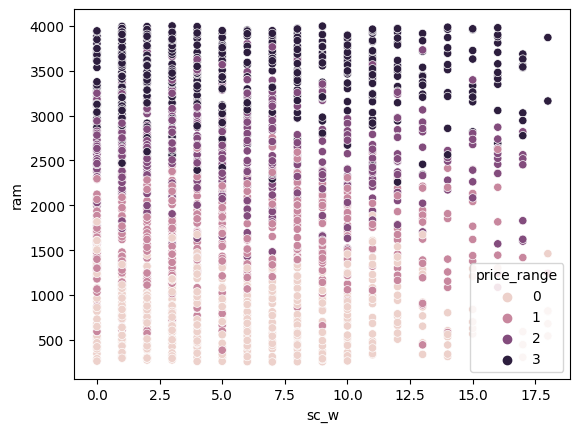

In [ ]:
# Create the scatter plot
sns.scatterplot(x=Mobile_Price_Classification_dataset['sc_w'], y=Mobile_Price_Classification_dataset['ram'], hue=Mobile_Price_Classification_dataset['price_range'])

**Check the Correlation between the Features and the Target**

In [ ]:
## Correlations
Mobile_Price_Classification_dataset.corr()['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

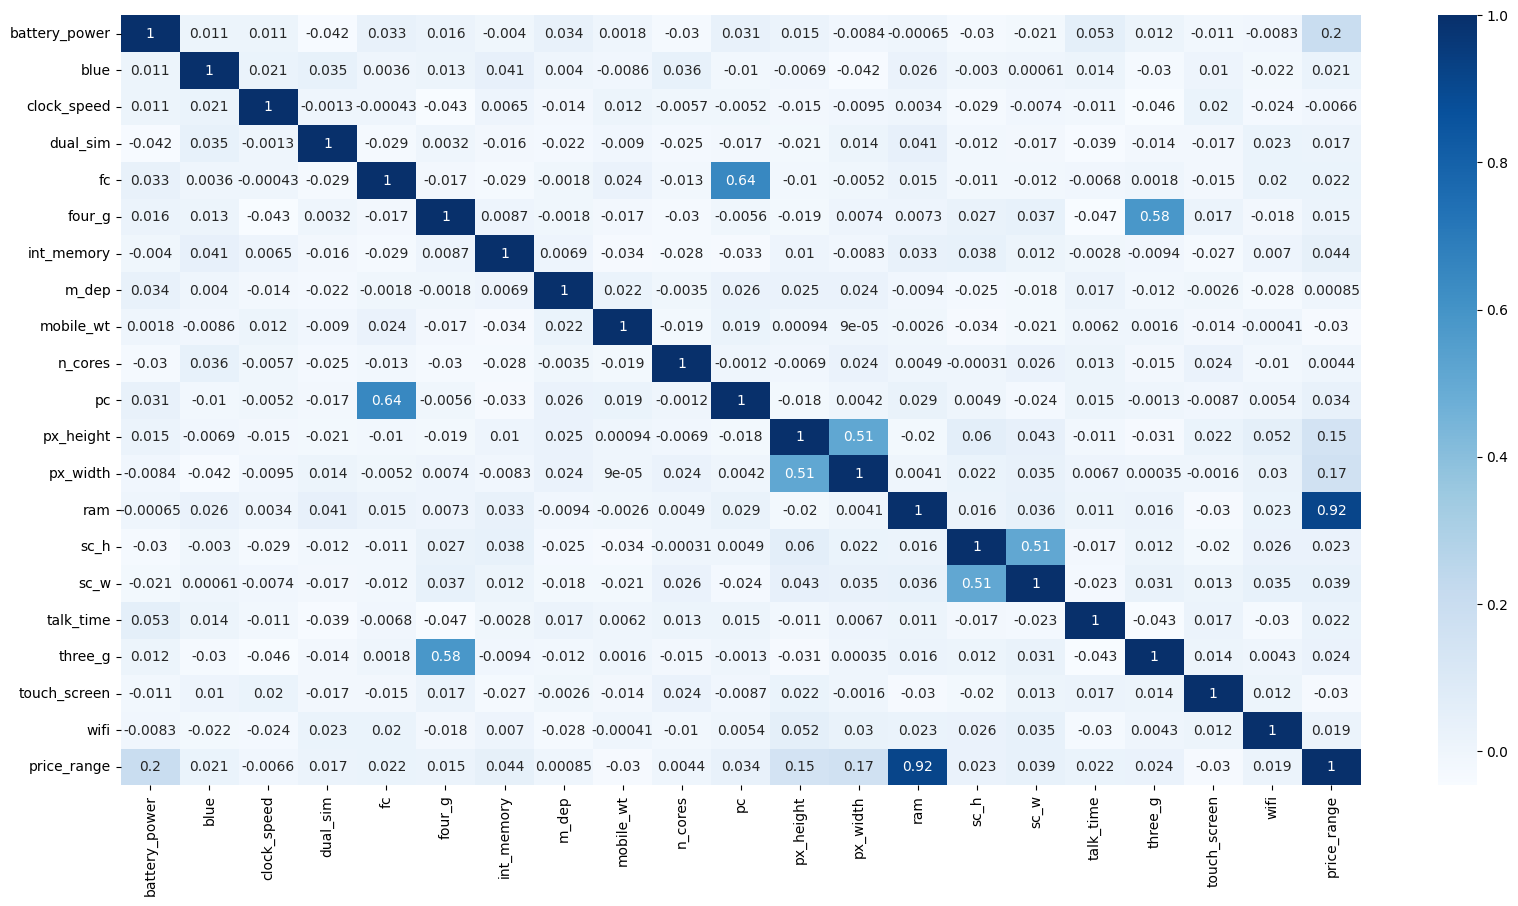

In [ ]:
## heatmap to explain the corelations more
plt.figure(figsize=(20, 10))
sns.heatmap(Mobile_Price_Classification_dataset.corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
Mobile_Price_Classification_dataset.drop(['m_dep', 'n_cores','four_g'], axis=1, inplace=True)

**Feature Engineering**

In [ ]:
## Feature Engineering --> Feature Extraction --> increase your dataset with Important Features --> Add the new column to the main DF
Mobile_Price_Classification_dataset['ram_per_battery_power'] = Mobile_Price_Classification_dataset['ram'] / Mobile_Price_Classification_dataset['battery_power']
Mobile_Price_Classification_dataset['blue_per_ram'] = Mobile_Price_Classification_dataset['blue'] / Mobile_Price_Classification_dataset['ram']
Mobile_Price_Classification_dataset['px_width_per_px_height'] = Mobile_Price_Classification_dataset['px_width'] / Mobile_Price_Classification_dataset['px_height']

In [ ]:
## check the correlation again
Mobile_Price_Classification_dataset.corr()['price_range'].sort_values(ascending=False)  ## some progress for out new features (very good)

price_range               1.000000
ram                       0.917046
ram_per_battery_power     0.554540
battery_power             0.200723
px_width                  0.165818
px_height                 0.148858
int_memory                0.044435
sc_w                      0.038711
pc                        0.033599
three_g                   0.023611
sc_h                      0.022986
fc                        0.021998
talk_time                 0.021859
blue                      0.020573
wifi                      0.018785
dual_sim                  0.017444
clock_speed              -0.006606
mobile_wt                -0.030302
touch_screen             -0.030411
px_width_per_px_height   -0.042489
blue_per_ram             -0.377520
Name: price_range, dtype: float64

**Split the Dataset**

In [ ]:
## Split the dataset into features and target
X = Mobile_Price_Classification_dataset.drop(columns=['price_range'], axis=1)  ## features
y = Mobile_Price_Classification_dataset['price_range']  ## target

In [ ]:
## Convert the Float64 values to float32
X = X.astype(np.float32)

In [ ]:
## Remove the NaN Values
X[np.isinf(X)] = np.nan

In [ ]:
## Split Data into Train_Full and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

## Data shapes
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (1600, 20)
y_train shape --  (1600,)
X_test shape --  (400, 20)
y_test shape --  (400,)


**PreProcessing Data**

In [ ]:
## Let's impute (although there is no nulls) and standardize the Dataset ---> All in Pipeline
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train = pd.DataFrame(num_pipline.fit_transform(X_train))
X_test = pd.DataFrame(num_pipline.transform(X_test))

**Model Selection**

In [ ]:

# identify the parameters that you want to choose the best from them
parameters = {'C': [200,250,300], 'kernel': ['rbf' , 'poly'], 'gamma': [0.1, 0.01]}

# Create a grid search object
grid_search = GridSearchCV(SVC(), parameters, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'C': 300, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
## Prediction
y_pred = grid_search.predict(X_train)
## accuracy score
print('Accuracy Scores in training data -- ', accuracy_score(y_train, y_pred))

print('--'*30)

## If you want to use cross validation
scores_acc = cross_val_score(estimator=grid_search, X=X_train, y=y_train, cv=8, n_jobs=-1, scoring='accuracy')
print('Accuracy Scores using cross validation -- ', scores_acc.mean())

Accuracy Scores in training data --  0.98375
------------------------------------------------------------
Accuracy Scores using cross validation --  0.941875


**Evaluate the Model**

In [ ]:
# Make predictions
predictions = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.9475
